In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os

In [2]:
# Display the files in the input directory
input_directory = r'C:\Users\lubna\OneDrive\Desktop\input'
for root, dirs, files in os.walk(input_directory):
    for file in files:
        print(os.path.join(root, file))

# Load the dataset
dataset_path = r"C:\Users\lubna\OneDrive\Desktop\creditcard.csv"
credit_card_data = pd.read_csv(dataset_path)



In [3]:
# Preview the dataset
credit_card_data.head(10)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
# Get dataset information
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Check for missing values
credit_card_data.isnull().sum()



Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Analyze class distribution
print("Unique values in the 'Class' feature:", credit_card_data['Class'].unique())
credit_card_data['Class'].value_counts()



Unique values in the 'Class' feature: [0 1]


0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Separate the data into fraud and non-fraud
fraud_cases = credit_card_data[credit_card_data.Class == 1]
non_fraud_cases = credit_card_data[credit_card_data.Class == 0]
print(fraud_cases.shape)
print(non_fraud_cases.shape)


(492, 31)
(284315, 31)


In [8]:
# Statistical summary of fraud and non-fraud cases
print("Fraud cases statistics")
print(fraud_cases['Amount'].describe())
print("\nNon-fraud cases statistics")
print(non_fraud_cases['Amount'].describe())

Fraud cases statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-fraud cases statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [9]:
# Balance the dataset by undersampling the majority class
non_fraud_cases = non_fraud_cases.sample(492)
balanced_data = pd.concat([non_fraud_cases, fraud_cases], axis=0)
print(balanced_data.shape)



(984, 31)


In [10]:
# Display the first and last few rows of the balanced dataset
balanced_data.head()
balanced_data.tail()

# Verify the unique values in the 'Class' column of the balanced dataset
print(balanced_data['Class'].unique())



[0 1]


Text(0.5, 1.0, 'Correlation Matrix for Credit Card Fraud Detection')

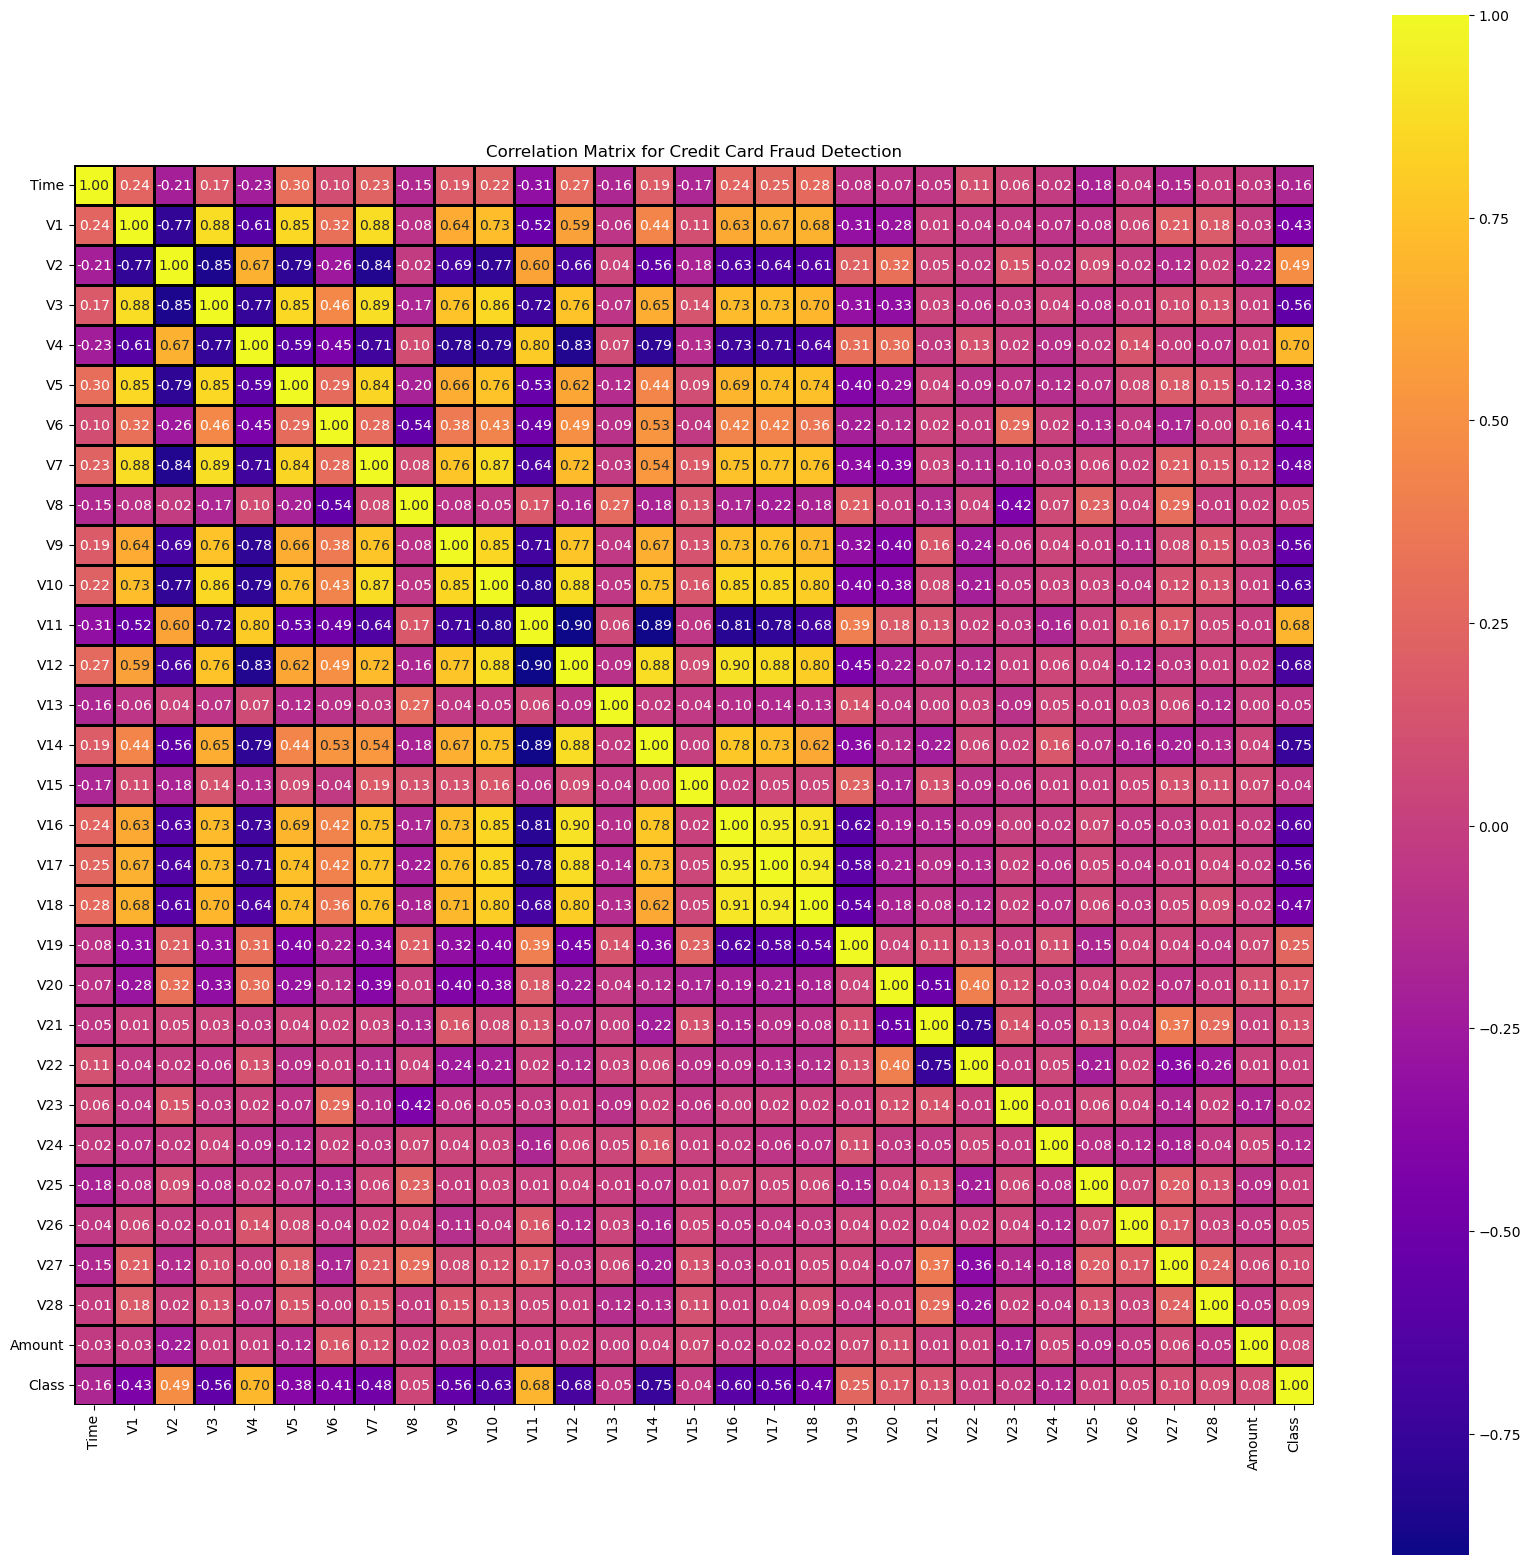

In [11]:
# Generate a correlation matrix
corr_matrix = balanced_data.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt="0.2f", square=True, cmap="plasma", linewidths=0.8, linecolor="Black")
plt.title("Correlation Matrix for Credit Card Fraud Detection")



In [12]:
# Select features with high correlation to the 'Class' column
high_corr_features = corr_matrix.index[abs(corr_matrix['Class']) >= 0.1].tolist()
high_corr_features.remove('Class')



In [13]:
# Define features and target variable
X = balanced_data[high_corr_features]
y = balanced_data['Class']



In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using Logistic Regression

In [17]:
# Train a logistic regression model
# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=10000)
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy score: {accuracy}")


Accuracy score: 0.9543147208121827


# Using Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
# Train a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.9644670050761421


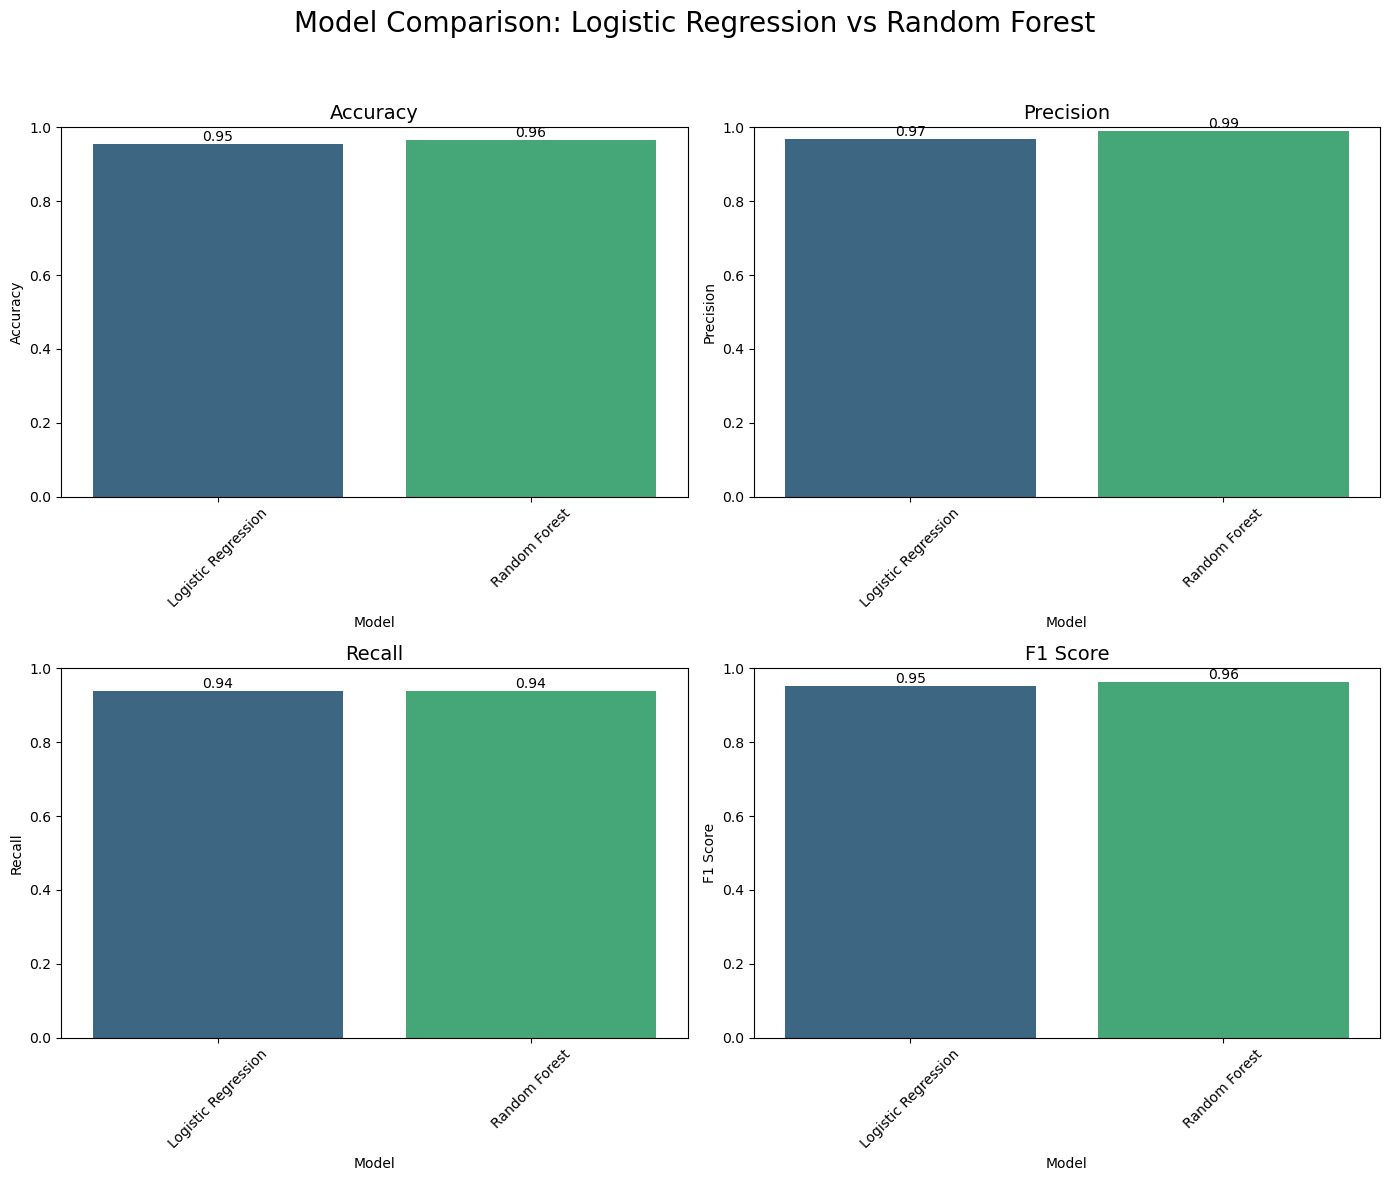

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.954315   0.968421  0.938776  0.953368
1        Random Forest  0.964467   0.989247  0.938776  0.963351


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
metrics = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_logistic), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_rf)]
}


metrics_df = pd.DataFrame(metrics)

# Plot performance metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Model Comparison: Logistic Regression vs Random Forest', fontsize=20)

# Accuracy plot
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Accuracy', fontsize=14)
axes[0, 0].set_ylim(0, 1)

# Precision plot
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Precision', fontsize=14)
axes[0, 1].set_ylim(0, 1)

# Recall plot
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Recall', fontsize=14)
axes[1, 0].set_ylim(0, 1)

# F1 Score plot
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('F1 Score', fontsize=14)
axes[1, 1].set_ylim(0, 1)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print the performance metrics
print(metrics_df)

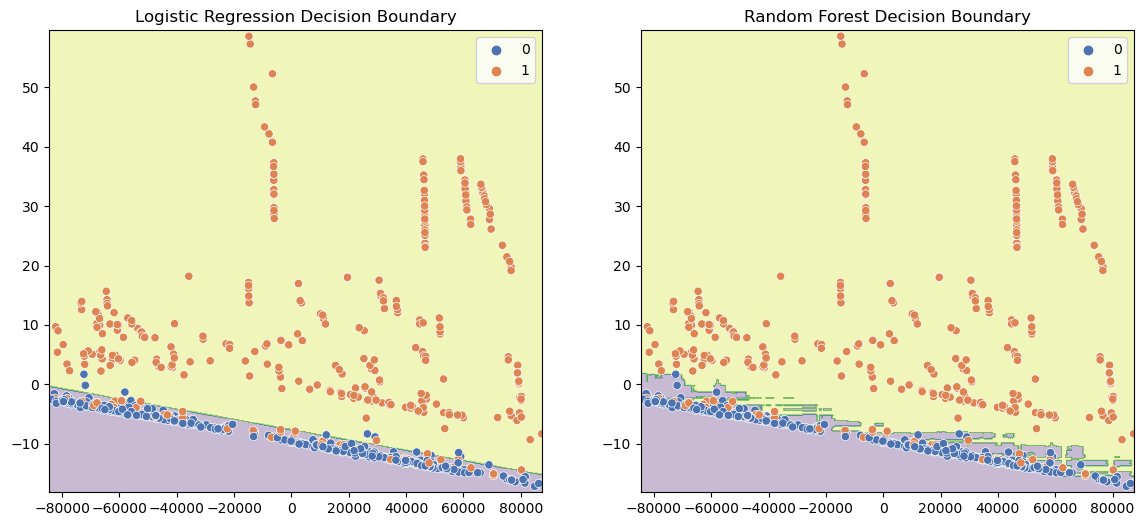

In [21]:
from sklearn.decomposition import PCA


# PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

logistic_model_pca = LogisticRegression(max_iter=10000)
rf_model_pca = RandomForestClassifier(n_estimators=100, random_state=42)

logistic_model_pca.fit(X_train_pca, y_train)
rf_model_pca.fit(X_train_pca, y_train)

# Plot decision boundaries for Logistic Regression
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1, 500),
                     np.linspace(X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1, 500))
Z = logistic_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=label_encoder.inverse_transform(y_train), palette='deep')
plt.title('Logistic Regression Decision Boundary')

# Plot decision boundaries for Random Forest
plt.subplot(1, 2, 2)
Z = rf_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=label_encoder.inverse_transform(y_train), palette='deep')
plt.title('Random Forest Decision Boundary')

plt.show()
